In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import bm3d

def PSNR(I,K):
    return 10*(np.log((255*255)/((I.astype(np.float)-K)**2).mean()))/np.log(10)


#显示图片
def plot_img(I):
   
    plt.figure(figsize = [10,8])
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
    #plt.imshow(I,cmap = "gray")
    plt.show()

    #将图像元素类型转换为 uin8
def float2uint8(I):
    return np.clip(I, 0, 255).astype(np.uint)

ori = cv2.imread("rick.jpg")  # 读入图像


Noise_rick PSNR 20.038976 dB


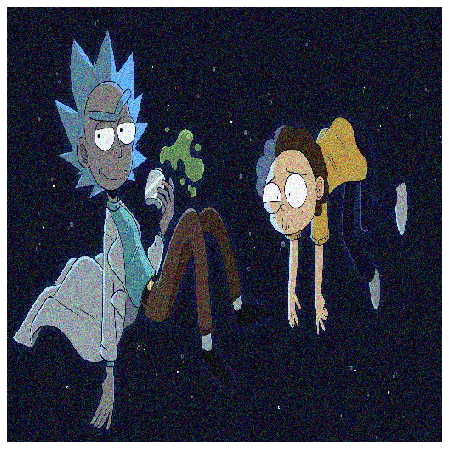

In [4]:
sigma = 30.0
noise_rick = float2uint8(ori+np.random.randn(*ori.shape)*sigma)
print('Noise_rick PSNR %f dB'%PSNR(ori,noise_rick ))
plot_img(noise_rick.astype(np.uint8))

In [30]:
%%time
#First Step: bm3d.BM3DStages.HARD_THRESHOLDING
denoised_image = float2uint8(bm3d.bm3d(noise_rick,30,stage_arg=bm3d.BM3DStages.ALL_STAGES ))

Wall time: 14.9 s


The PSNR between the two img of the Second step is 28.786749


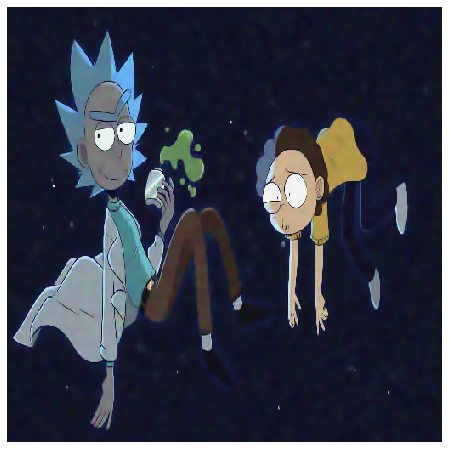

In [31]:
print ("The PSNR between the two img of the Second step is %f" % PSNR(ori, denoised_image))
plot_img(denoised_image.astype(np.uint8))